In [204]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import pandas as pd

In [205]:
array = []
city = []
uber = []
with open(r"C:\Users\Admin\Documents\UberProject\data\CityStats.csv", 'r') as citystats:
    next(citystats)
    for line in citystats:
        array.append(line.replace("'",'').replace("\n",'').split(','))
        city.append(line.replace("'",'').replace("\n",'').split(',')[0])
        uber.append(line.replace("'",'').replace("\n",'').split(',')[-1])
    

In [206]:
city_np_array = np.array(array)

In [207]:
city_np_array_data= city_np_array.copy()
city_np_array_target= city_np_array.copy()

In [208]:
city_data = city_np_array_data[:,1:-1]

In [209]:
from sklearn.decomposition import RandomizedPCA
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(city_np_array_data[:,1:-1])
kmeans.labels_

array([5, 3, 5, 3, 0, 5, 2, 5, 5, 0, 0, 3, 4, 5, 3, 0, 5, 0, 3, 5, 5, 5, 0,
       3, 4, 5, 0, 5, 5, 4, 0, 4, 1, 5, 2, 5, 0, 5, 4, 5, 5, 5, 4, 3, 5, 5,
       0, 0, 3, 4, 3, 0, 0, 0, 5, 0, 5, 5, 5, 5, 5, 3, 5])

In [213]:
u = RandomizedPCA(n_components=2)
data = u.fit_transform(city_data)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


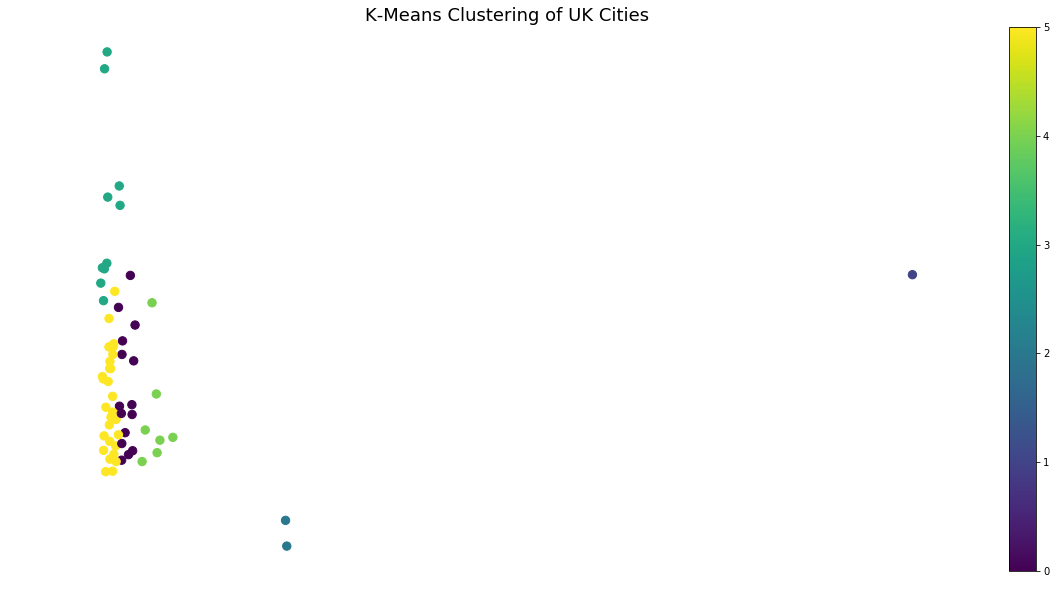

In [244]:
plt.figure(figsize=(20,10))
plt.scatter(data[:,0],data[:,1],c= kmeans.labels_,s=70)
plt.title("K-Means Clustering of UK Cities", fontsize=18)
plt.colorbar()
plt.axis("off")
plt.savefig(r"C:\Users\Admin\Documents\UberProject\code\CitiesClustering\CitiesCluster.png")
plt.show()

In [218]:
df = pd.DataFrame(city)

In [219]:
df['labels'] = kmeans.labels_.tolist()
df['uber'] = uber

In [230]:
df.columns=['City', 'Labels','Uber']
df

,City,Labels,Uber
0,Aberdeen,5,0
1,Aldershot,3,0
2,Barnsley,5,0
3,Basildon,3,0
4,Belfast,0,1
5,Birkenhead,5,0
6,Birmingham,2,1
7,Blackburn,5,0
8,Blackpool,5,0
9,Bournemouth,0,1
